# Introduction: Quantum Inspired Stock Predictions
Background:
Financial data is highly volatile and difficult to predict using supervised learning methods such as Deep Learning. Quantum systems are able to capture complex relations and hold probabilities for multiple outcomes. We assume that a there is a quantum wave that is able to make good predictions on the stock market, but we don't attempt to create the quantum circuit, we reverse engineer it using data.



Questions to address
- What is the goal?
- What is the motivation?
- How do we use data to achieve this?

# What is the goal?
The goal is to use machine learning methods to approximate a quantum wave that predicts stock market prices on the S&P500. We can leverage quantum properties like entanglement and interferance to obtain financial predictions, but what wave or circuit would lead to such predictions? This wave becomes our target function and we use data to approxiamate it. What better then the transformer architecture to obtain this quantum wave? The transformer can pick up on non-local relationships and volatiility inherent in quantum systems. We start by approximating the target function using simpler models and built up the transformer.

# What is the motivation?
Assuming that quantum systems can model financial data, there is promise in employing machine learning models to reverse engineer this wave.

# How do we use data to achieve this?
We use closing prices on stocks as our data, but we transform each closing price into a wave. This wave can be obtained by turning each closing price into a Gaussian distribution and turning it into a Fourier series. The learning algorithm will output a wave that we can collapse into a stock price prediction for the next day.

![Modeling machine learning problems](./MLFD_Learning.png)

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.fft import fft, ifft
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Data Preparation
The data is transformed into waves using a Fast Fourier Transform.

In [11]:
# Define the stock and date range
start = '1980-01-01'
end = '2024-08-10'
stock = '^GSPC'

# Download the stock data
yfd = yf.download(stock, start=start, end=end)

# Prepare the DataFrame
df = pd.DataFrame({'Close': yfd['Close']})
df = df.dropna().reset_index()

# Convert dates to numerical values
t = pd.to_datetime(df['Date'])
t = (t - t.min()) / np.timedelta64(1, 'D')  # Time in days since start
t = t.values
print(t, t.shape)

[*********************100%***********************]  1 of 1 completed

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.6289e+04 1.6290e+04 1.6291e+04] (11246,)


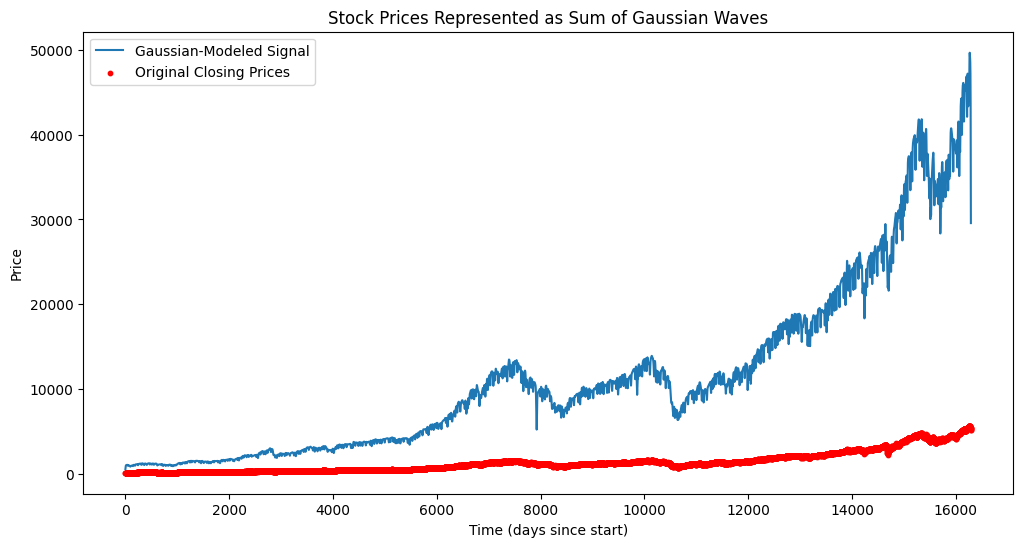

In [14]:
# Create a high-resolution time axis for the continuous signal
t_min, t_max = t.min(), t.max()
t_continuous = np.linspace(t_min, t_max, num=10000)
signal = np.zeros_like(t_continuous)


# Standard deviation for the Gaussian pulses
sigma = 5  # Adjust this value as needed

# Sum of Gaussian pulses
for i in range(len(df)):
    A = df['Close'].iloc[i]
    t0 = t[i]
    gaussian_pulse = A * np.exp(-((t_continuous - t0) ** 2) / (2 * sigma ** 2))
    signal += gaussian_pulse


plt.figure(figsize=(12, 6))
plt.plot(t_continuous, signal, label='Gaussian-Modeled Signal')
plt.scatter(t, df['Close'], color='red', s=10, label='Original Closing Prices')
plt.title('Stock Prices Represented as Sum of Gaussian Waves')
plt.xlabel('Time (days since start)')
plt.ylabel('Price')
plt.legend()
plt.show()



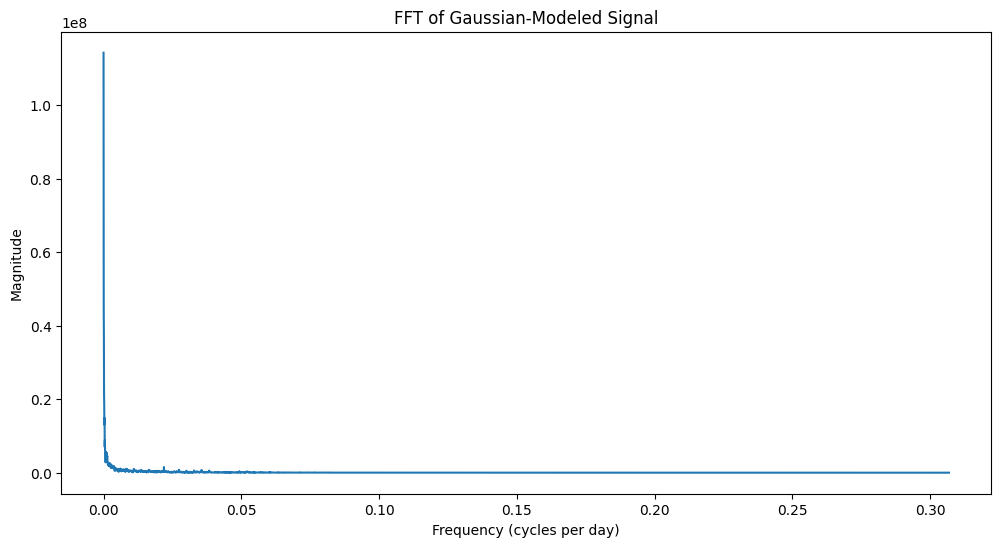

In [15]:
# Perform FFT
Y = np.fft.fft(signal)
freq = np.fft.fftfreq(len(t_continuous), d=(t_continuous[1] - t_continuous[0]))

# Only take the positive half of the spectrum
idx = np.argsort(freq)
freq = freq[idx]
Y = Y[idx]

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq[len(freq)//2:], np.abs(Y[len(freq)//2:]))
plt.title('FFT of Gaussian-Modeled Signal')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Magnitude')
plt.show()


## Apply the Learning Model

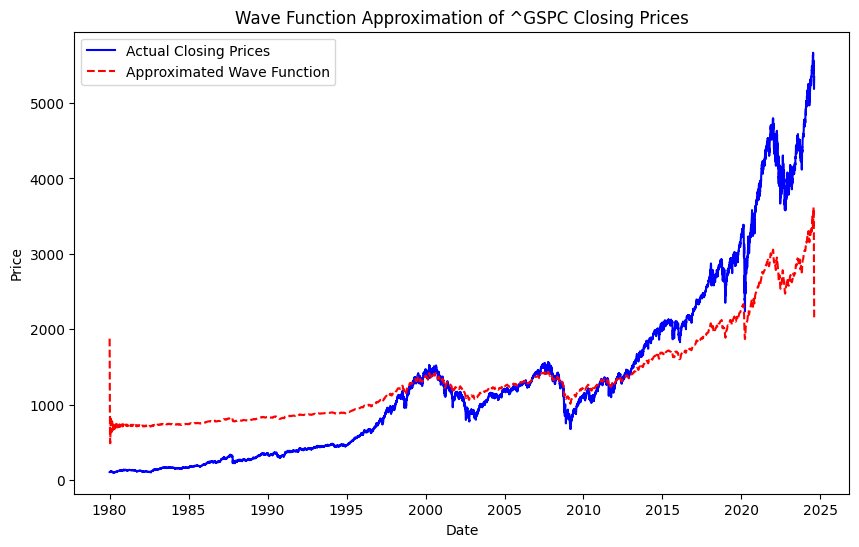

Predicted next price: 2135.6711991380735


In [8]:
# Step 2: Filter significant frequencies (optional, to smooth the function)
cutoff = int(0.05 * n)  # Keep only the top 5% of the frequencies
filtered_frequencies = np.zeros_like(frequencies)
filtered_frequencies[:cutoff] = frequencies[:cutoff]

# Step 3: Apply Inverse Fourier Transform to get the approximated wave function
approx_wave_function = ifft(filtered_frequencies)

# Step 4: Use the wave function to make predictions (collapsing the wave)
# Example: Predict the next price based on the "collapsed" wave function
predicted_next_price = np.real(approx_wave_function[-1])  # Collapse to the last value

# Plot the actual vs approximated wave function
plt.figure(figsize=(10, 6))
plt.plot(df.index, prices, label='Actual Closing Prices', color='blue')
plt.plot(df.index, np.real(approx_wave_function), label='Approximated Wave Function', linestyle='--', color='red')
plt.title(f'Wave Function Approximation of {stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the predicted next price (collapsed value)
print(f"Predicted next price: {predicted_next_price}")